Valor interpolado em x = 0.25: 2.598921875


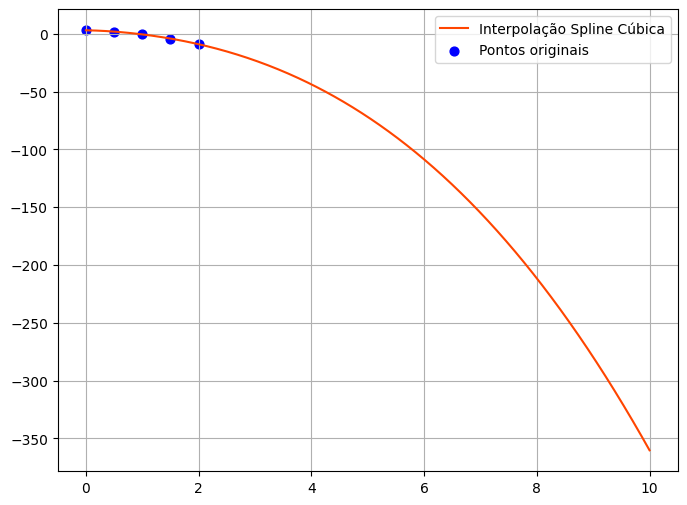

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def pegarDadosCsv():
    T = []

    # Coloca os dados do .csv na matriz T
    with open('pontosQ10.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')

        pulaLinha1 = True

        for row in spamreader:

            
            if pulaLinha1: # Esse if serve para pula a linha que tem as letras 'x' e 'y'
                pulaLinha1 = False
                continue

            result = row[0].split(',')
            T.append((float(result[0]), float(result[1])))

    return T

# Pontos de amostra
T = np.array(pegarDadosCsv()) 
#T = [(0, 3), (0.5, 1.8616), (1, -0.5571), (1.5, -4.1987), (2, -9.0536)]

# Separa os pontos em coordenadas x e y
x_points, y_points = zip(*T)

# Cria a spline cúbica com os pontos fornecidos
spline = CubicSpline(x_points, y_points)

# Gera valores para o gráfico da função spline
x = np.linspace(0, 10, 500)
y = spline(x)

# Cria o gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='#FF4500', linewidth=1.5, label="Interpolação Spline Cúbica")
plt.scatter(x_points, y_points, color='blue', s=40, marker='o', label="Pontos originais") # Adiciona os pontos originais
plt.grid()
plt.legend()

# Exibe o valor interpolado em x=0.25
print(f"Valor interpolado em x = 0.25: {spline(0.25)}")

# Mostra o gráfico
plt.show()